###**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore") 

###**Load Dataset**

In [ ]:
df = pd.read_csv('/content/Credit Card Customer Data.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


###**Exploratory Data Analysis**

####**Informasi Dataset**

In [ ]:
# Mengecek dimensi data
df.shape

(660, 7)

In [ ]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


####**Mengecek Missing Value**

In [ ]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<Axes: >

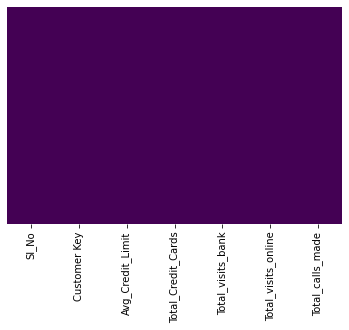

In [ ]:
#Menyajikan visualisasi data
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')

####**Mengecek Outlier**

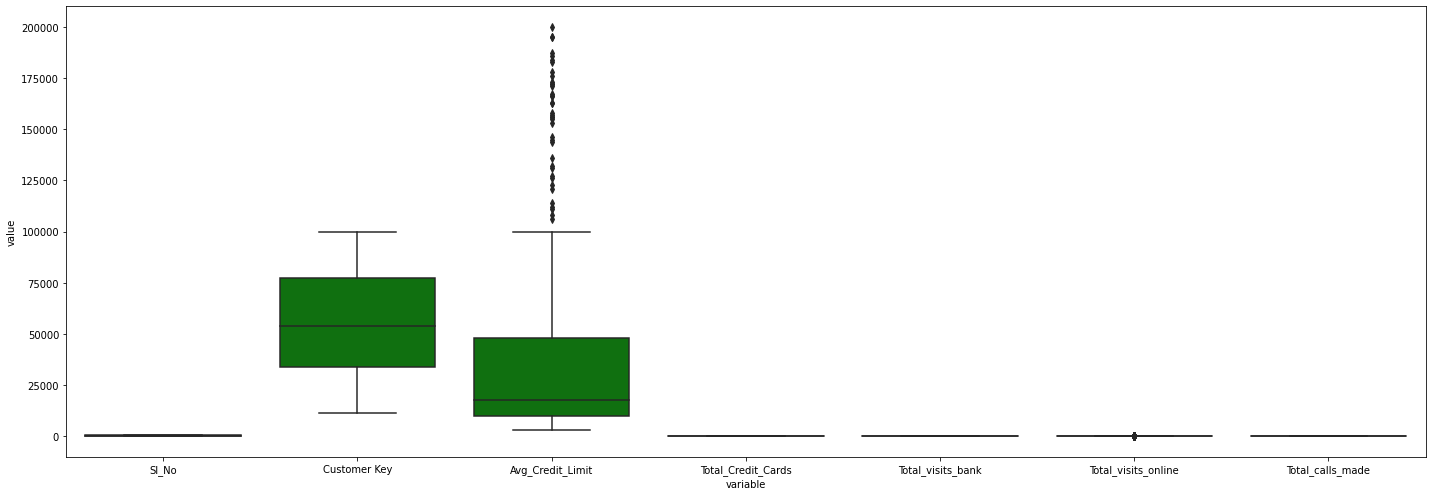

In [ ]:
fig = plt.figure(figsize = (20,7))
sns.boxplot(x = 'variable', y = 'value', color = 'green', orient = 'v', data = pd.melt(df))
plt.tight_layout()

Terdapat nilai outlier pada kolom "Avg_Credit_Limit" dan kolom "Total_visits_online"

####**Mengecek Statistik Data**

In [ ]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


###**Preprocessing Data**

####**Seleksi Fitur**

Terdapat beberapa kolom yang tidak diperlukan, maka kolom tersebut akan di hapus

In [ ]:
df = df.drop(columns = ['Sl_No', 'Customer Key'])
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


####**Menghapus Outlier**

Menghapus outlier pada kolom "Avg_Credit_Limit" dan kolom "Total_visits_online"

In [ ]:
#Menghitung Skor IQR kolom Avg_Credit_Limit
sorted(df)
Q1 = df['Avg_Credit_Limit'].quantile(0.25)
Q3 = df['Avg_Credit_Limit'].quantile(0.75)
IQR = Q3-Q1

# Menghapus outlier
ll = Q1-IQR*1.5
ul = Q3+IQR*1.5
df.loc[df['Avg_Credit_Limit'] < ll,'Avg_Credit_Limit'] = ll
df.loc[df['Avg_Credit_Limit'] > ul,'Avg_Credit_Limit'] = ul

In [ ]:
#Menghitung Skor IQR kolom Total_visits_online
sorted(df)
q1 = df['Total_visits_online'].quantile(0.25)
q3 = df['Total_visits_online'].quantile(0.75)
iqr = q3-q1

# Menghapus outlier
l = q1-iqr*1.5
u = q3+iqr*1.5
df.loc[df['Total_visits_online'] < l,'Total_visits_online'] = l
df.loc[df['Total_visits_online'] > u,'Total_visits_online'] = u

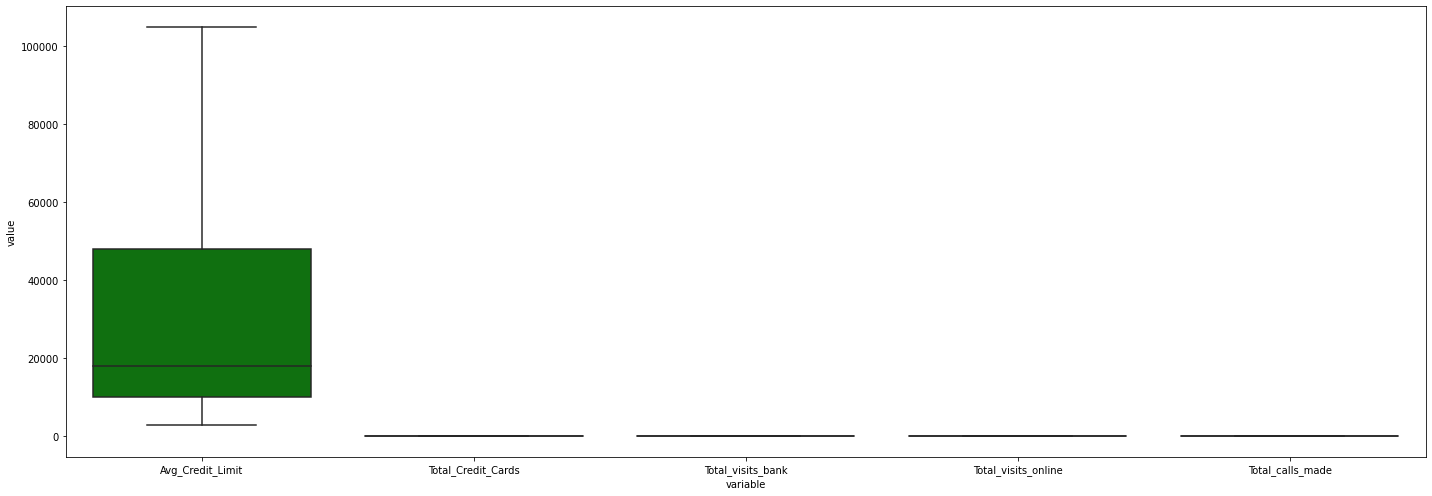

In [ ]:
# Mengecek kembali boxplot
fig = plt.figure(figsize = (20,7))
sns.boxplot(x = 'variable', 
            y = 'value', 
            color = 'green', 
            orient = 'v', 
            data = pd.melt(df))
plt.tight_layout()

####**Normalisasi Data**

Normalisasi data berfungsi untuk mengskalakan data sehingga memiliki nilai dalam rentang 0 - 1

In [ ]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

df_norm.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.950980,0.111111,0.2,0.117647,0.0
1,0.460784,0.222222,0.0,1.000000,0.9
2,0.460784,0.666667,0.2,0.352941,0.4
3,0.264706,0.444444,0.2,0.117647,0.4
4,0.950980,0.555556,0.0,1.000000,0.3


###**Elbow Method**

Metode ini merupakan sebuah trik yang digunakan untuk mengetahui jumlah cluster paling optimal yang nanti nya akan digunakan pada model

In [ ]:
kmeans = KMeans()
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_norm)
    inertia.append(kmeans.inertia_)

df_inertia = pd.DataFrame({"n_cluster": K, "inertia": inertia})
df_inertia

,n_cluster,inertia
0,1,260.463543
1,2,153.878051
2,3,81.097869
3,4,64.966537
4,5,55.900138
5,6,49.679191
6,7,44.635258
7,8,41.963542
8,9,40.222726


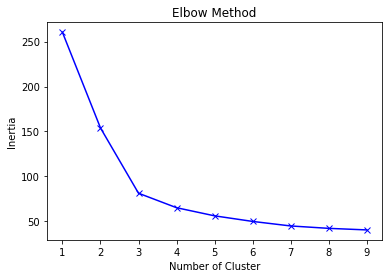

In [ ]:
plt.plot(K, inertia, "bx-")
plt.xlabel("Number of Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

Dari grafik tersebut dapat dilihat bahwa cluster paling optimal itu berjumlah 3

###**Modeling**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans = kmeans.fit(df_norm)
centroids = kmeans.cluster_centers_

In [ ]:
kmeans.labels_

array([0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
centroids

array([[0.30188439, 0.5018759 , 0.69922078, 0.11550802, 0.19948052],
       [0.09071895, 0.15802469, 0.18666667, 0.41594771, 0.68577778],
       [0.97705882, 0.86      , 0.12      , 0.96235294, 0.108     ]])

In [ ]:
# Membuat kolom cluster pada dataset awal
clusters_kmeans = kmeans.labels_
df["cluster"] = clusters_kmeans
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,100000,2,1,1.0,0,0
1,50000,3,0,8.5,9,1
2,50000,7,1,3.0,4,0
3,30000,5,1,1.0,4,1
4,100000,6,0,8.5,3,2


In [ ]:
# Melihat distribusi cluster
df.cluster.value_counts()

0    385
1    225
2     50
Name: cluster, dtype: int64

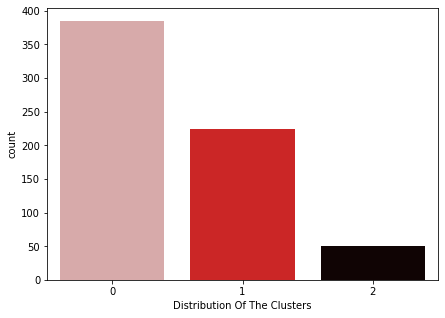

In [ ]:
# Visualisasi distribusi cluster
plt.figure(figsize=(7,5))
colors = ["#dea2a2","#e60b0b", "#120202"]
sns.countplot(x='cluster', data=df, palette=colors)
plt.xlabel("Distribution Of The Clusters")
plt.show()

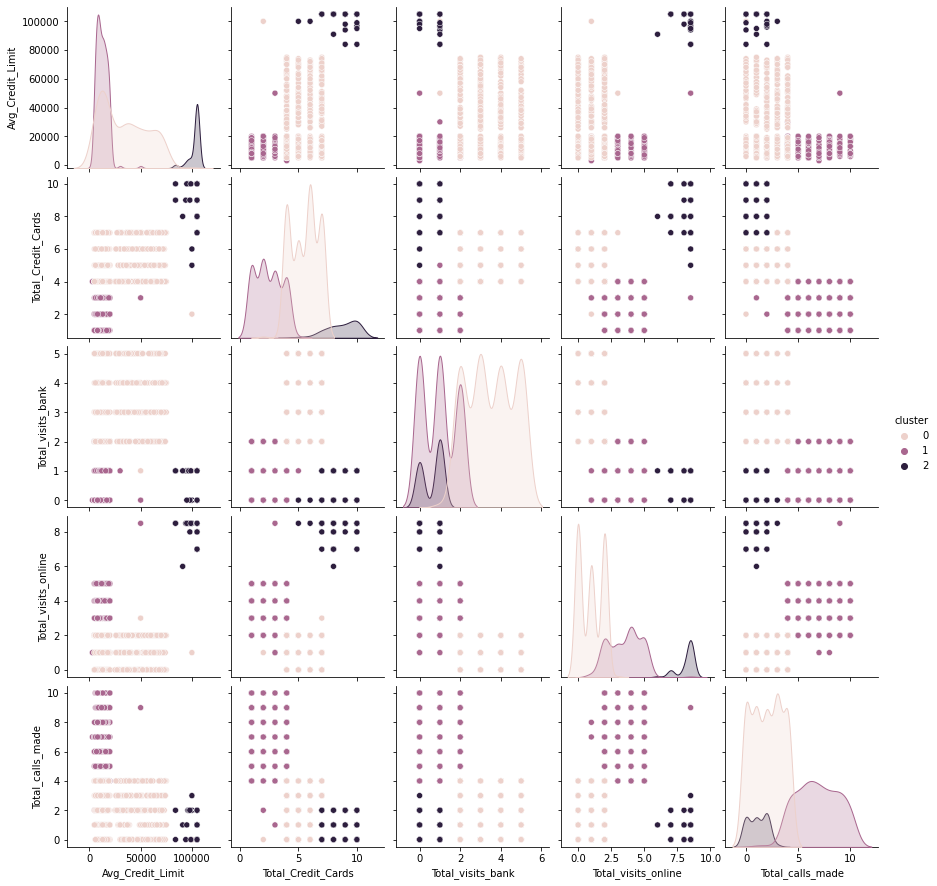

In [ ]:
sns.pairplot(df, hue = "cluster")

###**Kesimpulan**

Dataset credit card customer berhasil di segmentasikan menjadi 3 klaster menggunakan metode K-Means melalui proses klasterisasi, dengan memanfaatkan elbow method yang memperoleh bahwa klaster paling optimal adalah berjumlah 3. Dan dapat dilihat pada pairplot tidak terjadi tumpang tindih yang signifikan antara tiap klaster. <br/>

Kluster dengan label 0 berjumlah 385, kluster dengan label 1 berjumlah 225, dan kluster dengan label 2 berjumlah 50. <br/>

Jika dilihat berdasarkan avg_credit_limit dan total_credit_cards diperoleh kesimpulan:

*   Cluster 1 (label 0) merupakan customer yang memiliki total credit dan rata-rata limit menengah
*   Cluster 2 (label 1) merupakan customer yang memiliki total credit dan rata-rata limit yang paling rendah
*   Cluster 3 (label 2) merupakan customer yang memiliki total credit card dan rata-rata limit yang paling tinggi